In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io.wavfile import read, write
from IPython.display import Audio
import math
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
#Audio
file_audio=('../audios/recording.wav')
fs,x=read(file_audio)
x=x/float(max(abs(x)))
x=x-np.mean(x)
t=np.arange(0,float(len(x))/fs,1/fs)
#Audio(x,rate=fs)

## Load Audio

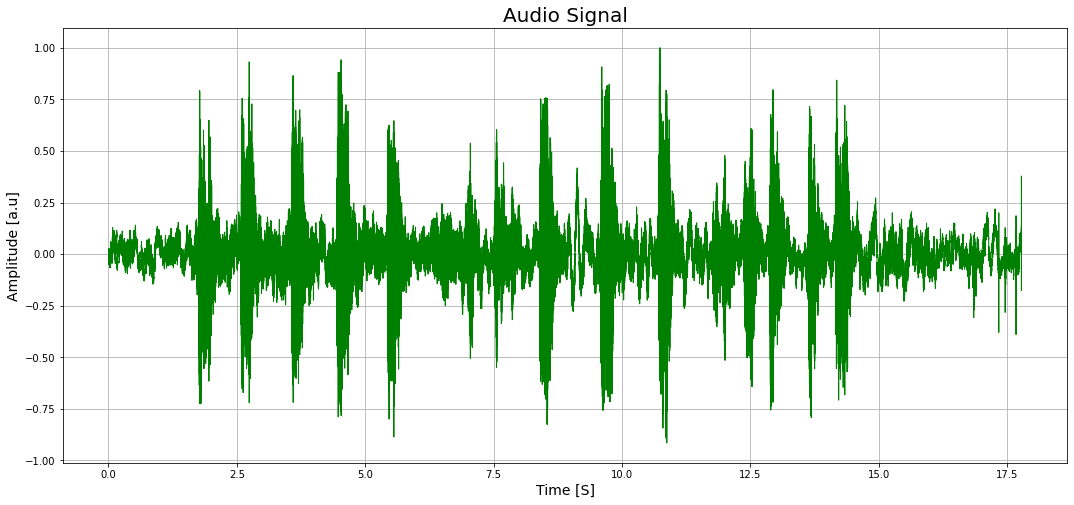

In [3]:
plt.figure(figsize=(18,8))
plt.plot(t,x,linewidth=1,color="g")
plt.xlabel("Time [S]",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Audio Signal",fontsize=20)
plt.grid()
plt.show()

## Parameters for a IRR Filter

In [4]:
N=5
fc1=2000
fc2=10000

ripple=5
att=40

ftype="Lowpass"
analog="Butterworth"

#fs=160000

## Normalize Frequencies and Choose Filter Type

In [5]:
Td=1/fs

waux1=2*np.pi*fc1
waux2=2*np.pi*fc2

wc1=(2/Td)*np.tan(waux1*Td/2)
wc2=(2/Td)*np.tan(waux2*Td/2)

if(ftype=="Lowpass"):
    wc=wc1
    ftype="lowpass"
elif(ftype=="Highpass"):
    wc=wc1
    ftype="highpass"
elif(ftype=="Bandpass"):
    wc=[wc1,wc2]
    ftype="bandpass"
elif(ftype=="Bandstop"):
    wc=[wc1,wc2]
    ftype="bandstop"

## Determines the Analog Filter

In [6]:
if(analog=="Butterworth"):
    b,a=signal.butter(N, wc, ftype, analog='True')
elif(analog=="Chebyshev I"):
    b,a=signal.cheby1(N, ripple, wc, ftype, analog='True')
elif(analog=="Chebyshev II"):
    b,a=signal.cheby2(N, att, wc, ftype, analog='True')
elif(analog=="Bessel"):
    b,a=signal.bessel(N, wc, ftype, analog='True')
elif(analog=="Elliptic"):
    b,a=signal.ellip(N, ripple, att, wc, ftype, analog='True')
#Bilinear Transform analog to digital filter

z,p=signal.bilinear(b,a,fs=fs)

wz,hz=signal.freqz(z,p,1024) 

## Filter Output

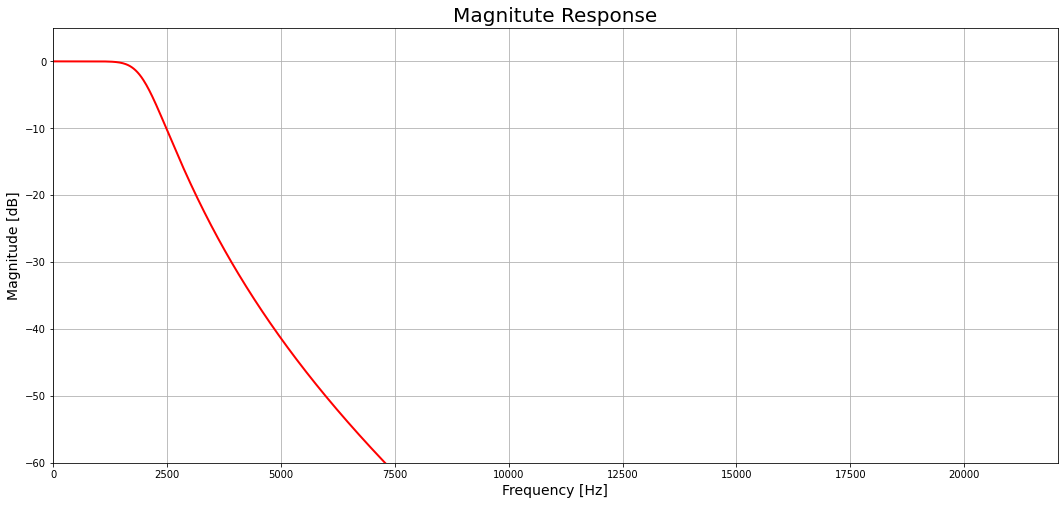

In [7]:
Mag = 20*np.log10(abs(hz))  
Freq = wz*fs/(2*np.pi) 

plt.figure(figsize=(18, 8)) 
plt.plot(Freq, Mag, 'r', linewidth=2) 
plt.xlabel('Frequency [Hz]', fontsize=14) 
plt.ylabel('Magnitude [dB]', fontsize=14)
plt.title('Magnitute Response', fontsize=20)
plt.xlim(0,fs/2)
plt.ylim(-60,5)
plt.grid()
plt.show()


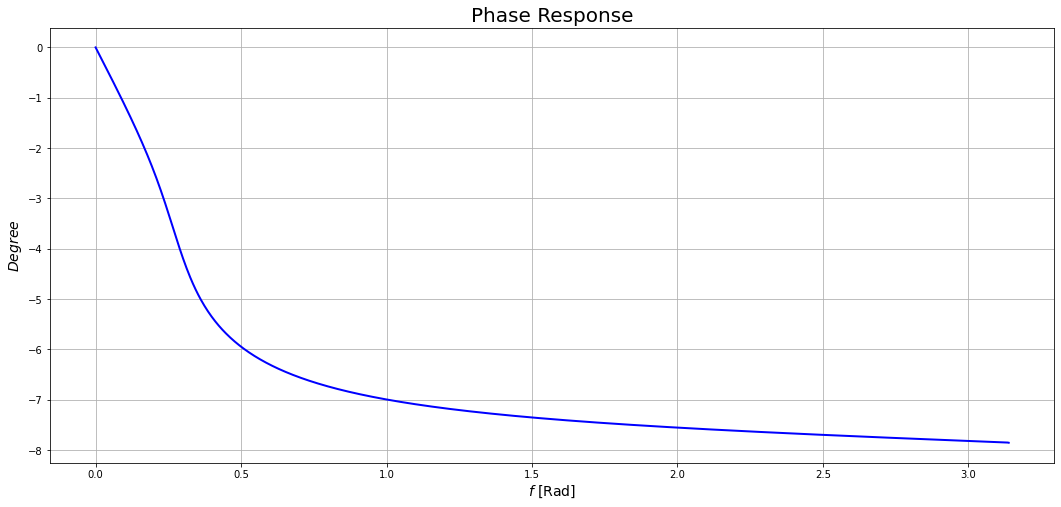

In [8]:
angles=np.unwrap(np.angle(hz))

plt.figure(figsize=(18,8))
plt.plot(wz,angles,linewidth=2,color="b")
plt.xlabel("$f$ [Rad]",fontsize=14)
plt.ylabel("$Degree$",fontsize=14)
plt.title("Phase Response",fontsize=20)
plt.grid()
plt.show()

In [9]:
y=signal.lfilter(z,p,x)              # x is the audio
#Audio(y,rate=fs)

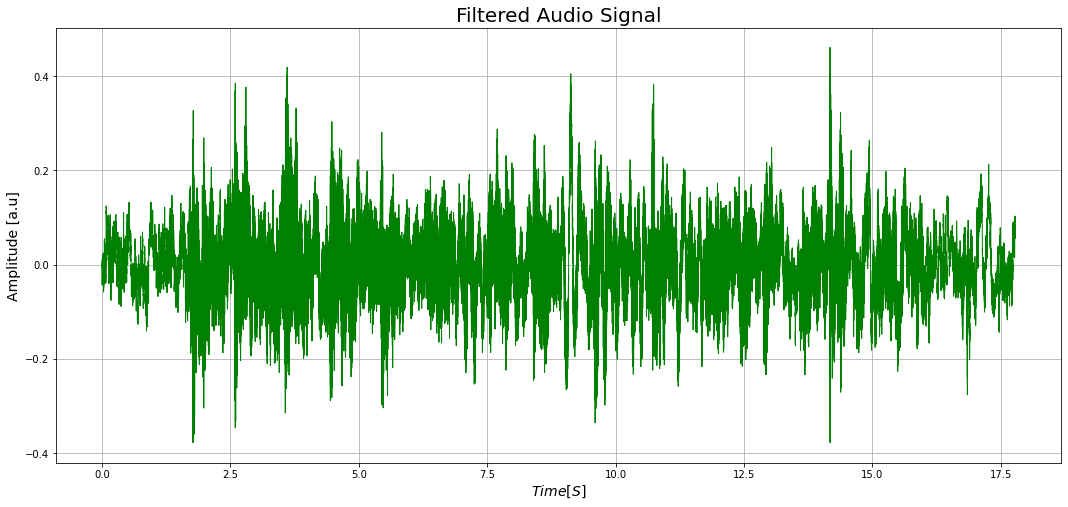

In [10]:
plt.figure(figsize=(18,8))
plt.plot(t,y,linewidth=1,color="g")
plt.xlabel("$Time [S]$",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Filtered Audio Signal",fontsize=20)
plt.grid()
plt.show()